<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> <font color="blue"> Solutions for </font>Two Qubits </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>

<a id="task3"></a>
<h3> Task 3 </h3>

We define a quantum circuit with two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.

We apply the Hadamard operator to $q_1$.

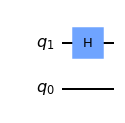

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(1) 
display(qc.draw(output='mpl',reverse_bits=True))

Then, the quantum operator applied to both qubits will be $ H \otimes I $.

Read the quantum operator of the above circuit by using 'unitary_simulator' and then verify that it is $ H \otimes I $.

<h3> Solution </h3>

$ H \otimes I = \hadamard \otimes \I =  \mymatrix{c|c}{ \sqrttwo \I & \sqrttwo \I \\ \hline \sqrttwo \I & -\sqrttwo \I } = \mymatrix{rr|rr} { \sqrttwo & 0 & \sqrttwo & 0 \\ 0 & \sqrttwo & 0 & \sqrttwo \\ \hline \sqrttwo & 0 & -\sqrttwo & 0 \\ 0 & \sqrttwo & 0 & -\sqrttwo } $

In [6]:
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3)
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(round(entry.real,3)) + " "
    print(column)

0.707 0.0 0.707 0.0 
0.0 0.707 0.0 0.707 
0.707 0.0 -0.707 0.0 
0.0 0.707 0.0 -0.707 


<a id="task5"></a>
<h3> Task 5 </h3>

Create a quantum curcuit with $ n=5 $ qubits.

Set each qubit to $ \ket{1} $.

Repeat 4 times:
<ul>
    <li>Randomly pick a pair of qubits, and apply cx-gate (CNOT operator) on the pair.</li>
</ul>

Draw your circuit, and execute your program 100 times.

Verify your measurement results by checking the diagram of the circuit. 

<h3> Solution </h3>

the indices of the controller and target qubits are 4 2
the indices of the controller and target qubits are 2 3
the indices of the controller and target qubits are 3 2
the indices of the controller and target qubits are 0 3


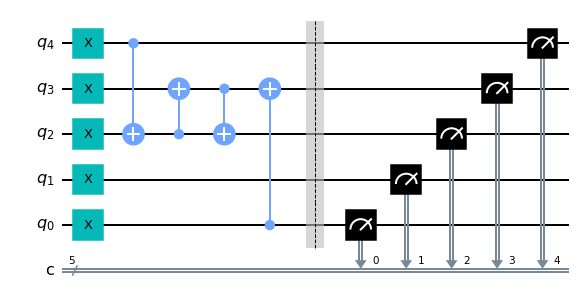

the measurument result is {'10111': 100}
our result is 10111


In [10]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

n = 5
m = 4

states_of_qubits = [] # we trace the state of each qubit also by ourselves

q =  QuantumRegister(n,"q") # quantum register with n qubits
c = ClassicalRegister(n,"c") # classical register with n bits

qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# set each qubit to |1>
for i in range(n):
    qc.x(q[i]) # apply x-gate (NOT operator)
    states_of_qubits.append(1) # the state of each qubit is set to 1
    
# randomly pick m pairs of qubits
for i in range(m):
    controller_qubit = randrange(n)
    target_qubit = randrange(n)
    # controller and target qubits should be different
    while controller_qubit == target_qubit: # if they are the same, we pick the target_qubit again
        target_qubit = randrange(n)
    # print our picked qubits
    print("the indices of the controller and target qubits are",controller_qubit,target_qubit)
    # apply cx-gate (CNOT operator)
    qc.cx(q[controller_qubit],q[target_qubit])
    # we also trace the results
    if states_of_qubits[controller_qubit] == 1: # if the value of the controller qubit is 1,
        states_of_qubits[target_qubit] = 1 - states_of_qubits[target_qubit] # then flips the value of the target qubit 
        # remark that 1-x gives the negation of x
    

# measure the quantum register
qc.barrier()
qc.measure(q,c)

# draw the circuit in reading order
display(qc.draw(output='mpl',reverse_bits=True))

# execute the circuit 100 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print("the measurument result is",counts)

our_result=""
for state in states_of_qubits:
    our_result = str(state) + our_result
print("our result is",our_result)

<a id="task6"></a>
<h3>Task 6</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.
<ul>
    <li> Apply Hadamard to the both qubits.
    <li> Apply CNOT($q_1$,$q_0$).
    <li> Apply Hadamard to the both qubits.
    <li> Measure the circuit.
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit implements CNOT($q_0$,$q_1$).

<h3> Solution </h3>

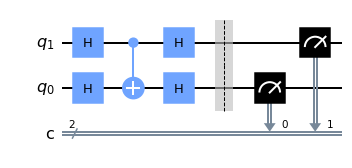

00 is mapped to {'00': 100}


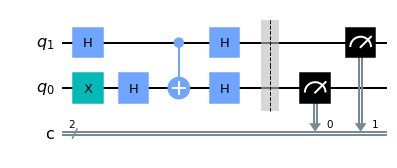

01 is mapped to {'11': 100}


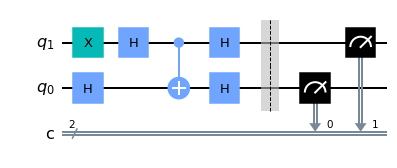

10 is mapped to {'10': 100}


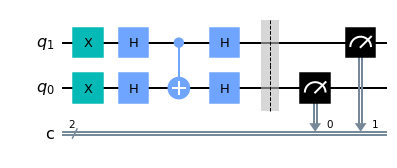

11 is mapped to {'01': 100}


In [12]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    q =  QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers
    
    # initialize the inputs w.r.t the reading order of Qiskit
    if input[0]=='1':
        qc.x(q[1]) # set the state of the up qubit to |1>
    if input[1]=='1':
        qc.x(q[0]) # set the state of the down qubit to |1>

    # apply h-gate to both qubits
    qc.h(q[0])
    qc.h(q[1])

    # apply cx(up-qubit,down-qubit)
    qc.cx(q[1],q[0])

    # apply h-gate to both qubits
    qc.h(q[0])
    qc.h(q[1])

    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit w.r.t the reading order of Qiskit
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # execute the circuit 100 times in the local simulator
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(input,"is mapped to",counts)

<a id="task7"></a>
<h3>Task 7</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.
<ul>
    <li> Apply CNOT($q_1$,$q_0$).
    <li> Apply CNOT($q_0$,$q_1$).
    <li> Apply CNOT($q_1$,$q_0$).
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit swaps the values of the first and second qubits:
<ul>
    <li> $\ket{00} \rightarrow \ket{00} $ </li>
    <li> $\ket{01} \rightarrow \ket{10} $ </li>
    <li> $\ket{10} \rightarrow \ket{01} $ </li>
    <li> $\ket{11} \rightarrow \ket{11} $ </li>
</ul>

<h3> Solution </h3>

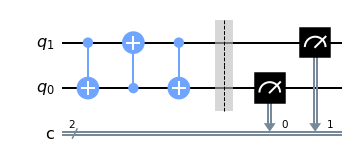

00 is mapped to {'00': 100}


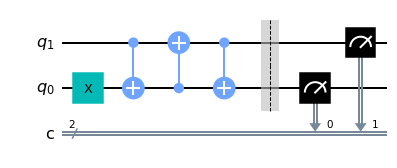

01 is mapped to {'10': 100}


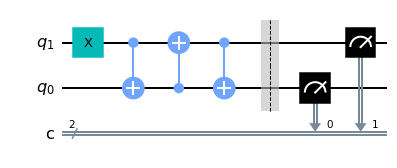

10 is mapped to {'01': 100}


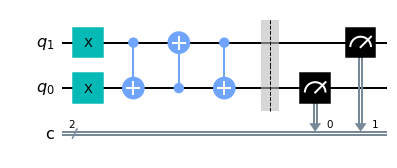

11 is mapped to {'11': 100}


In [13]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    q =  QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers
    
    #initialize the inputs w.r.t the reading order of Qiskit
    if input[0]=='1':
        qc.x(q[1]) # set the state of the up qubit to |1>
    if input[1]=='1':
        qc.x(q[0]) # set the state of the down qubit to |1>

    # apply cx(up-qubit,down-qubit)
    qc.cx(q[1],q[0])
    # apply cx(down-qubit,up-qubit)
    qc.cx(q[0],q[1])
    # apply cx(up-qubit,down-qubit)
    qc.cx(q[1],q[0])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit w.r.t the reading order of Qiskit
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # execute the circuit 100 times in the local simulator
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(input,"is mapped to",counts)